**Chennai House Prediction**

In [69]:
#Generic libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor




In [70]:
#Getting Dataset
data=pd.read_csv("/content/train-chennai-sale.csv")

In [71]:
#Display first 5 row of dataset
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


**Data Cleaning**

In [72]:
# Displaying rows and columns
data.shape


(7109, 22)

In [73]:
#Checking Nan values
data.isnull().sum()


PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**Imputing the null values**

In [74]:
print(data['N_BEDROOM'].value_counts())


1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64


In [75]:
data['N_BEDROOM']=data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0])

In [76]:
print(data['N_BATHROOM'].value_counts())

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64


In [77]:
data['N_BATHROOM']=data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0])

In [78]:
data['QS_OVERALL'].value_counts()

3.540    59
3.260    57
3.320    56
3.560    55
3.360    54
         ..
2.545     1
2.110     1
3.965     1
4.345     1
4.940     1
Name: QS_OVERALL, Length: 479, dtype: int64

In [79]:
data['QS_OVERALL'].fillna(data['QS_OVERALL'].median(),inplace=True)

In [80]:
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [81]:
#Drop duplicates
data=data.drop_duplicates()

In [82]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [83]:
#Changing datatype in to correct format
data['N_BEDROOM'] = data['N_BEDROOM'].astype(np.int64)
data['N_BATHROOM'] = data['N_BATHROOM'].astype(np.int64)
data.DATE_SALE = pd.to_datetime(data.DATE_SALE, format='%d-%m-%Y')##Converting from obj to datetime 
data.DATE_BUILD = pd.to_datetime(data.DATE_BUILD, format='%d-%m-%Y')##Converting from obj to datetime


In [84]:
data.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

**Dropping unwanted features**

In [85]:
data=data.drop(["COMMIS","REG_FEE"],axis=1)

In [86]:
data=data.drop(["PRT_ID"],axis=1)

In [87]:
data.shape

(7109, 19)

**Detecting Outliers**

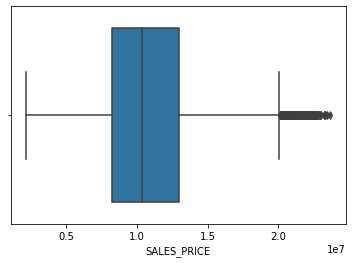

In [88]:
sns.boxplot(data['SALES_PRICE'])

In [89]:
print(np.where(data['SALES_PRICE']>2.0))

(array([   0,    1,    2, ..., 7106, 7107, 7108]),)


In this dataset we cannot remove outliers because some house may have such kind of sale prices.



**Checking the uniques values in categorical data**

In [90]:
#convert the string in to lower in AREA Column
data.AREA=data.AREA.str.lower()

In [91]:
#Checking the unique values
data.AREA.unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'tnagar', 't nagar', 'chrompt', 'chrmpet', 'karapakam',
       'ana nagar', 'chormpet', 'adyr', 'velchery', 'ann nagar',
       'kknagar'], dtype=object)

In [92]:
#Correcting the spelling mistake in area
data.AREA = data.AREA.replace({'karapakam':'karapakkam','ana nagar':'anna nagar', 
     'ann nagar':'anna nagar', 'adyr':'adyar','velchery':'velachery', 'tnagar':'T nagar','t nagar':'T nagar','chormpet':'chrompet', 
      'chrompt':'chrompet', 'chrmpet':'chrompet', 'kknagar':'kk nagar'})
data.AREA.unique()

array(['karapakkam', 'anna nagar', 'adyar', 'velachery', 'chrompet',
       'kk nagar', 'T nagar'], dtype=object)

In [93]:
#Correcting the spelling in sales
data.SALE_COND = data.SALE_COND.str.lower()

In [94]:
data.SALE_COND = data.SALE_COND.replace({ 'ab normal':'abnormal','partiall':'partial','adj land':'adjland', 
                       'normal sale':'normal sale' })
data.SALE_COND.unique()

array(['abnormal', 'family', 'partial', 'adjland', 'normal sale'],
      dtype=object)

In [95]:
#Correcting the spelling in parking facility
data.PARK_FACIL=data.PARK_FACIL.str.lower()
data.PARK_FACIL.unique()

array(['yes', 'no', 'noo'], dtype=object)

In [96]:

data.PARK_FACIL = data.PARK_FACIL.replace({'yes':'yes','noo':'no','no':'no'})
data.PARK_FACIL.unique()

array(['yes', 'no'], dtype=object)

In [97]:
#Correcting the spelling in buildtype
data.BUILDTYPE=data.BUILDTYPE.str.lower()
data.BUILDTYPE.unique()

array(['commercial', 'others', 'other', 'house', 'comercial'],
      dtype=object)

In [98]:
data.BUILDTYPE = data.BUILDTYPE.replace({'comercial':'commercial','others':'other'})
data.BUILDTYPE.unique()

array(['commercial', 'other', 'house'], dtype=object)

In [99]:
#Correcting the spelling in utility available
data.UTILITY_AVAIL=data.UTILITY_AVAIL.str.lower()
data.UTILITY_AVAIL.unique()

array(['allpub', 'elo', 'nosewr ', 'nosewa', 'all pub'], dtype=object)

In [100]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.replace({'allpub':'all pub','nosewr ':'nosewa'})
data.UTILITY_AVAIL.unique()

array(['all pub', 'elo', 'nosewa'], dtype=object)

In [101]:
#Correcting the spelling in street
data.STREET=data.STREET.str.lower()
data.STREET.unique()

array(['paved', 'gravel', 'no access', 'pavd', 'noaccess'], dtype=object)

In [102]:
data.STREET = data.STREET.replace({'pavd':'paved','noaccess':'no access'})
data.STREET.unique()

array(['paved', 'gravel', 'no access'], dtype=object)

In [103]:
#Correcting the spelling in mzzone
data.MZZONE = data.MZZONE.str.lower()
data.MZZONE.unique()


array(['a', 'rh', 'rl', 'i', 'c', 'rm'], dtype=object)

**Creating a new feature "AGE"**

> Indented block



In [104]:
data['AGE'] = pd.DatetimeIndex(data.DATE_SALE).year - pd.DatetimeIndex(data.DATE_BUILD).year
data.head(3)


,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,karapakkam,1004,2011-05-04,131,1,1,3,abnormal,yes,1967-05-15,commercial,all pub,paved,a,4.0,3.9,4.9,4.330,7600000,44
1,anna nagar,1986,2006-12-19,26,2,1,5,abnormal,no,1995-12-22,commercial,all pub,gravel,rh,4.9,4.2,2.5,3.765,21717770,11
2,adyar,909,2012-02-04,70,1,1,3,abnormal,yes,1992-02-09,commercial,elo,gravel,rl,4.1,3.8,2.2,3.090,13159200,20


In [105]:
data.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

**Expolaratory analysis**

In [106]:
correlation=data.corr()

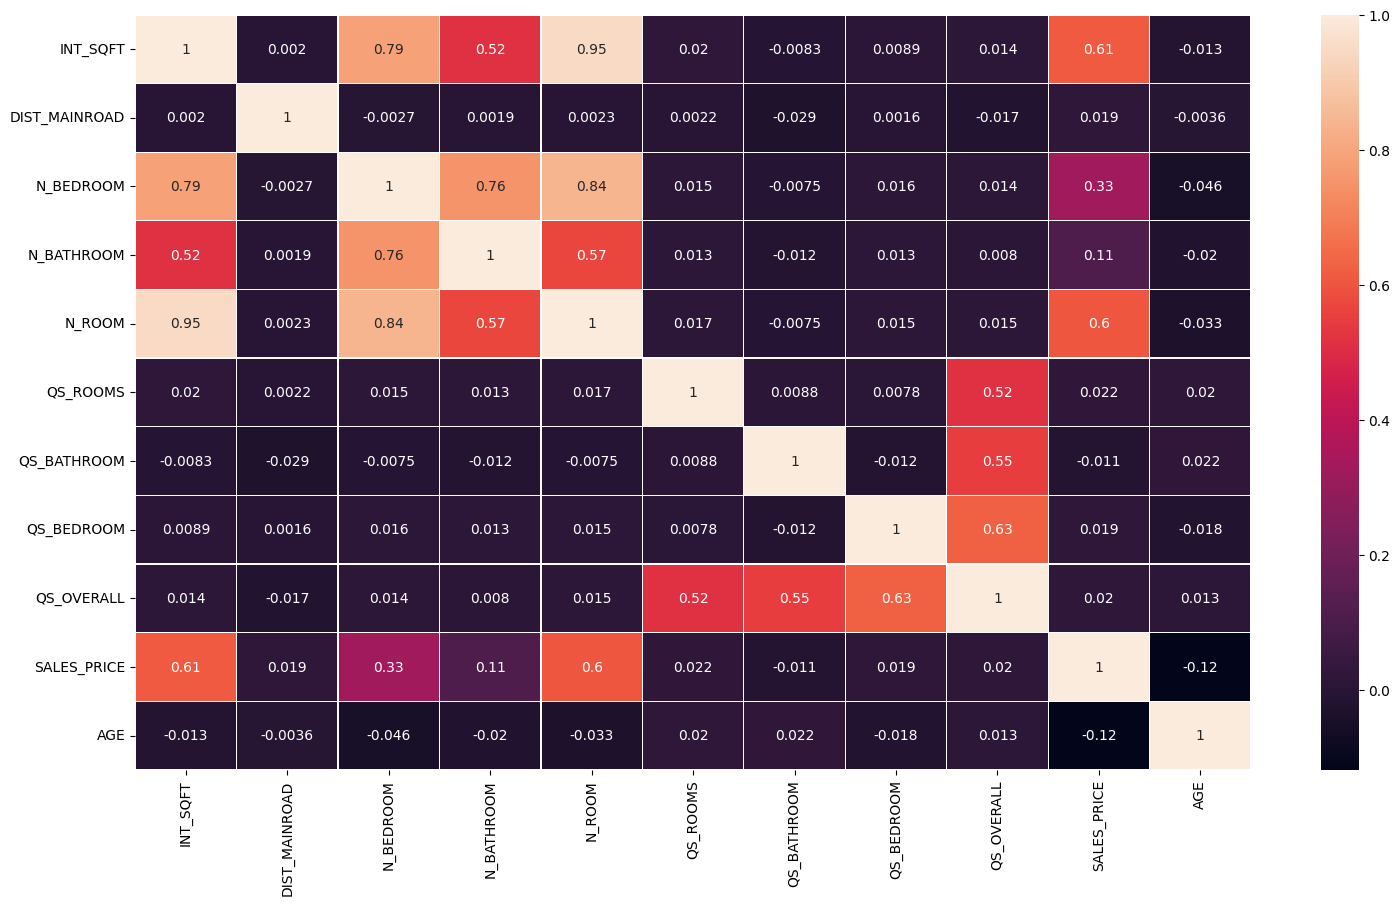

In [107]:
plt.figure(figsize=(18,10), dpi=100)
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True,linewidth=0.2)

We can infer that white box column have highly correlated with target data and red box indicates less relation between feature and target and black box shows there is no relation between the feature and target.Though it has less relation or zero relation it doesn't mean that feature is not important.we have to check individually and find the linear relation to know the feature importance.

**Checking the relationship between categorical column and target column**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

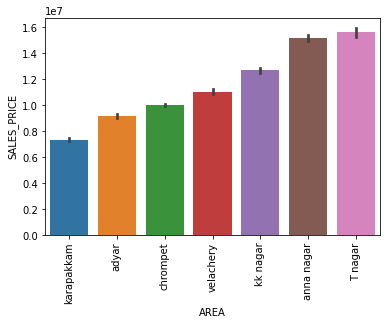

In [108]:
#Area and Sales price
Area_order=data.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA']
sns.barplot(x='AREA',y='SALES_PRICE',data=data,order=Area_order)
plt.xticks(rotation=90)

The feature 'Area' and target 'Sales_price' has high linear relation between the data.we can infer by plotting there is a price variation according to the area.So there is an order,label encoding is best to change categorical values to numerical values.

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

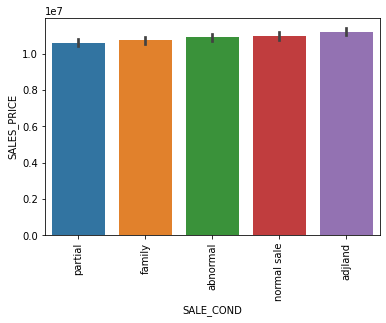

In [109]:
#Sale_cond and Sales price
SaleCond_order=data.groupby('SALE_COND')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['SALE_COND']
sns.barplot(x='SALE_COND',y='SALES_PRICE',data=data,order=SaleCond_order)
plt.xticks(rotation=90)

We can infer from plot that sales conditon doesnot impact much in sales price.There is no linear relation between feature and target,so we can drop the feature.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

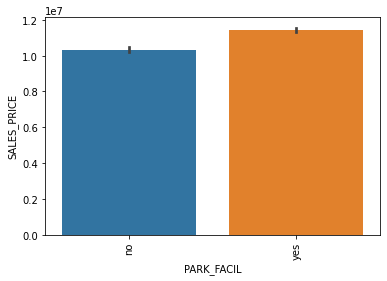

In [110]:
#Parking facility and sales price
Parking_order=data.groupby('PARK_FACIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['PARK_FACIL']
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=data,order=Parking_order)
plt.xticks(rotation=90)

Parking facility has a great impact in sales price.It has high linear relation,sales price varies with the parking facility.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

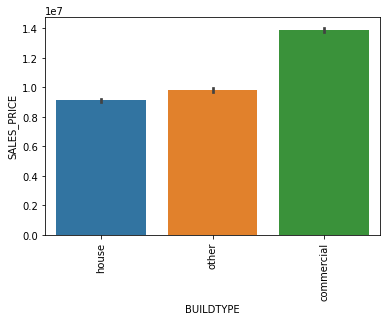

In [111]:
#Build type and sales price
BuildType_order=data.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE']
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=data,order=BuildType_order)
plt.xticks(rotation=90)

It has high impact on sales price but there is no linear relation between feature and target so one hot encoding is highly recommended.

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

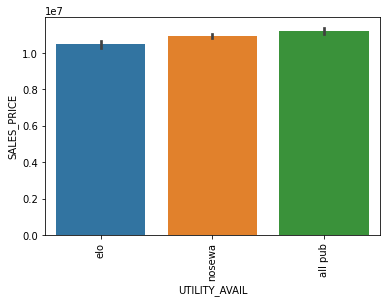

In [112]:
#UtilityAvailable and sales price
UtilityAvailable_order=data.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL']
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=data,order=UtilityAvailable_order)
plt.xticks(rotation=90)

There is a little linear relation between feature and target,so label encoding is recommended

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

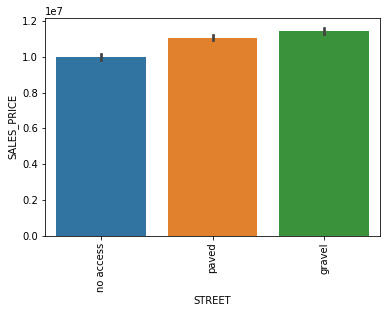

In [113]:
#Street and sales price
Street_order=data.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET']
sns.barplot(x='STREET',y='SALES_PRICE',data=data,order=Street_order)
plt.xticks(rotation=90)

The Sales price increases according to the place of building.Street has high linear relation so label encoding is highly recommended.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

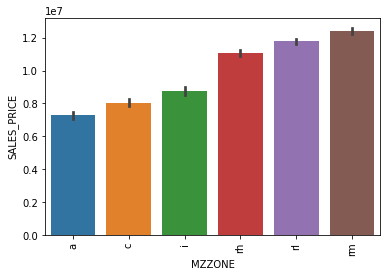

In [114]:
#Mzzone and sales price
Mzzone_order=data.groupby('MZZONE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['MZZONE']
sns.barplot(x='MZZONE',y='SALES_PRICE',data=data,order=Mzzone_order)
plt.xticks(rotation=90)

Sales price increases with the variation in the Mzzone.It has some order so there is a high linear relation between the feature and the target.Label encoding is recommended.

**Checking relationship between numerical feature and target**

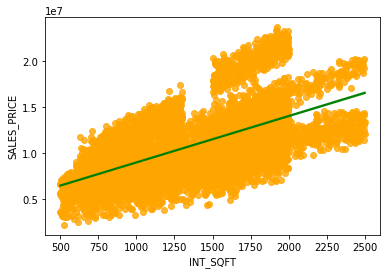

In [115]:
#INT_SQFT AND SALES_PRICE
sns.regplot(x='INT_SQFT',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})

Sales price increases with the variation in the square feet.It has some order so there is a high linear relation between the feature and the target.

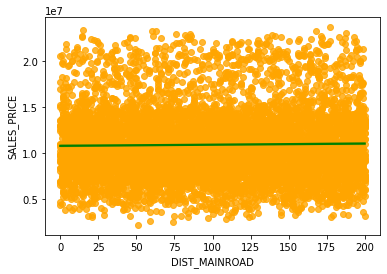

In [116]:
sns.regplot(x='DIST_MAINROAD',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is no linear relationship between sales price and distance main road,so we can drop that feature.

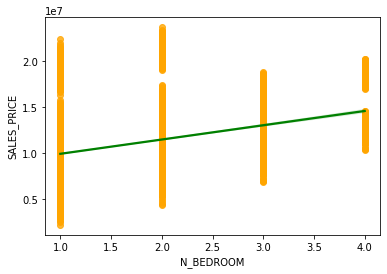

In [117]:
sns.regplot(x='N_BEDROOM',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})



Sales price increases with the variation in the number of bedroom.It has some order so there is a high linear relation between the feature and the target.

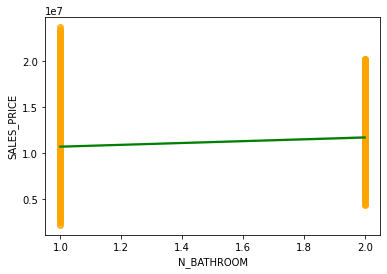

In [118]:
sns.regplot(x='N_BATHROOM',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})


Sales price increases with the variation in the number of bathroom.It has some order so there is a high linear relation between the feature and the target.

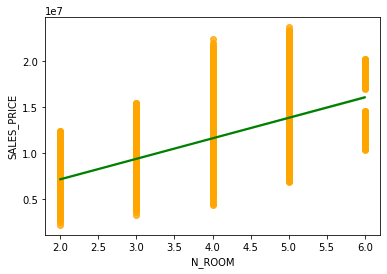

In [119]:
sns.regplot(x='N_ROOM',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})


Sales price increases with the variation in the number of room.It has some order so there is a high linear relation between the feature and the target.

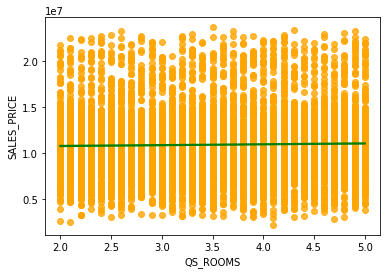

In [120]:
#QS_ROOMS and SALES_PRICE
sns.regplot(x='QS_ROOMS',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is no linear relationship between sales price and QS_ROOMS,so we can drop that feature.

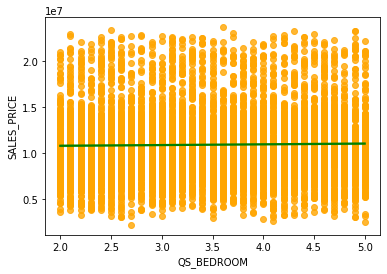

In [121]:
#QS_BEDROOM and SALES_PRICE
sns.regplot(x='QS_BEDROOM',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is low linear relationship between sales price and QS_BEDROOM.we can drop the feature

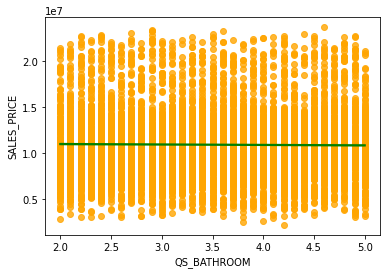

In [122]:
#QS_BATHROOM and SALES_PRICE
sns.regplot(x='QS_BATHROOM',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is no linear relationship between sales price and QS_BATHROOM,so we can drop that feature.

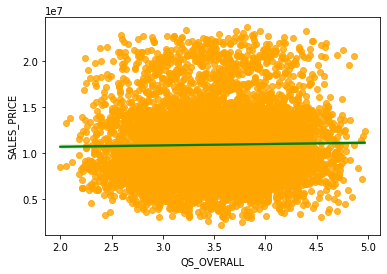

In [123]:
sns.regplot(x='QS_OVERALL',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})


There is NO linear relationship between sales price and QS_OVERALL, so we can drop that feature.

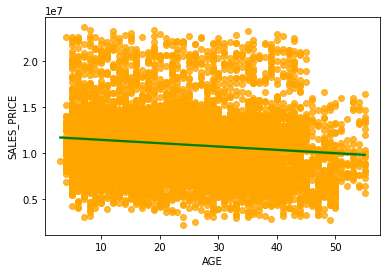

In [124]:
sns.regplot(x='AGE',y='SALES_PRICE',data=data,scatter_kws={'color':'orange'},line_kws={'color':'green'})

There is a negative high linear relationship between sales price and AGE, so we can use this feature.

**Dropping unwanted feature**

After carefull consideration we can infer which feature is important and which is not important.There is no use of feature which has no relation with the target column so drop that feature to make accurate prediction.

In [125]:
data.drop(['DIST_MAINROAD','DATE_SALE','SALE_COND','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL','DATE_BUILD'],axis=1,inplace=True)

In [126]:
data.head(3)

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE
0,karapakkam,1004,1,1,3,yes,commercial,all pub,paved,a,7600000,44
1,anna nagar,1986,2,1,5,no,commercial,all pub,gravel,rh,21717770,11
2,adyar,909,1,1,3,yes,commercial,elo,gravel,rl,13159200,20


In [127]:
data.dtypes

AREA             object
INT_SQFT          int64
N_BEDROOM         int64
N_BATHROOM        int64
N_ROOM            int64
PARK_FACIL       object
BUILDTYPE        object
UTILITY_AVAIL    object
STREET           object
MZZONE           object
SALES_PRICE       int64
AGE               int64
dtype: object

**Encoding the categorical column**

We need all column to be in numerical form to model machine learning algorithm.Encoding is performed to convert categorical data in to numerical data.There are two type of encoding,
1.Label Encoding
2.One hot Encoding

**Label Encoding:**
if there is an sequential order in their values of feature label encoding is performed.

**One hot Encoding:**If there is not any order in their values dummy variable s created using one hot encoding.

In [128]:
data.AREA = data.AREA.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           'T nagar' : 7})

In [129]:
data.PARK_FACIL = data.PARK_FACIL.map({'yes':1,
                                       'no':0})

In [130]:
#Buildtype one hot encoding
data = pd.get_dummies(data,columns=['BUILDTYPE'])
                                       

In [131]:
data.UTILITY_AVAIL = data.UTILITY_AVAIL.map({'all pub' : 1, 'elo' : 2, 'nosewa' : 3})
                                          

In [132]:
data.STREET = data.STREET.map({'no access' : 1,
                               'paved' : 2, 
                               'gravel' : 3})

In [133]:
data.MZZONE = data.MZZONE.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 6,
                               'rm' : 7})

In [134]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_commercial,BUILDTYPE_house,BUILDTYPE_other
0,1,1004,1,1,3,1,1,2,1,7600000,44,1,0,0
1,6,1986,2,1,5,0,1,3,6,21717770,11,1,0,0
2,2,909,1,1,3,1,2,3,5,13159200,20,1,0,0
3,4,1855,3,2,5,0,3,2,3,9630290,22,0,0,1
4,1,1226,1,1,3,1,1,3,2,7406250,30,0,0,1


**Preparing the data**

In [137]:
#X=['AREA','INT_SQFT','N_BEDROOM','N_BATHROOM','N_ROOM','PARK_FACIL','UTILITY_AVAIL','STREET','MZZONE','AGE','BUILDTYPE_commercial','BUILDTYPE_house','BUILDTYPE_other']
#y='SALES_PRICE'
X=data.drop(columns=['SALES_PRICE'],axis=1).values
y=data['SALES_PRICE'].values

**Splitting the data into Train and test:**


In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 5)

**Scaling data: Standard scalar**:




In [145]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train,y_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

**Model Fitting**

**LINEAR REGRESSION**

In [146]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

**Prediction**

In [147]:
y_pred = regressor.predict(X_test)
y_pred

array([10805186.24562931, 14303204.61226033, 14294472.34320919, ...,
        7479694.73214018,  9636965.77420139, 15514036.09222913])

**Evaluation metric**

In [148]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9108166912088967


**KNEARESTNEIGHBOURS ALGORITHM**

In [180]:
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.model_selection import cross_val_score
for i in [1,2,3,5,6,7,8,9,10,20,50]:
  knn = KNeighborsRegressor(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model



K value  :  1  train score :  0.9999971391844843  score :  0.9292791799453545
K value  :  2  train score :  0.982912850213462  score :  0.943358516193569
K value  :  3  train score :  0.9760270239318439  score :  0.9461085151584772
K value  :  5  train score :  0.9680878344480582  score :  0.94749462750423
K value  :  6  train score :  0.9648625618438158  score :  0.9470452439312391
K value  :  7  train score :  0.9623467127077701  score :  0.9463225334821667
K value  :  8  train score :  0.9608166124060511  score :  0.9459125598709672
K value  :  9  train score :  0.9589764309444598  score :  0.9448331303073584
K value  :  10  train score :  0.9569732114022814  score :  0.9440252498394217
K value  :  20  train score :  0.943438909554077  score :  0.933271553625916
K value  :  50  train score :  0.9129073799146683  score :  0.9040288381838325


NameError: ignored

In [181]:
knn = KNeighborsRegressor(5)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9496403397077646

**DECISION TREE ALGORITHM:**

In [166]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)


DecisionTreeRegressor()

**Evaluation Metric**

In [167]:
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

R2- SCORE: 0.9745253769376032


**RANDOM FOREST ALGORITHM**

In [168]:
Rf = RandomForestRegressor(n_estimators= 100, max_depth = 10, max_features='sqrt')
Rf.fit(X_train, y_train);


**Evaluation Metric**

In [169]:
y_pred_Rf = Rf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_Rf))

R2- SCORE: 0.9774822586310192


**XG BOOST ALGORITHM:**

In [162]:
for lr in [0.2,0.3,0.4,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.2  Train score :  0.9940406832714893  Test score :  0.9930819700057311
Learning rate :  0.3  Train score :  0.9948560297843942  Test score :  0.9932404537035155
Learning rate :  0.4  Train score :  0.9951447997172427  Test score :  0.9936705723943492
Learning rate :  0.5  Train score :  0.9949864454411714  Test score :  0.9934621808830185
Learning rate :  0.7  Train score :  0.9957968378265033  Test score :  0.9945796490652657
Learning rate :  0.8  Train score :  0.9957066398942098  Test score :  0.9939438987989442
Learning rate :  1  Train score :  0.9959358308355389  Test score :  0.9936912967752732


In [161]:
xg = xgb.XGBRegressor(learning_rate = 0.7, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_gbr = xg.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

R2- SCORE: 0.9945796490652657


**Interpretation:**

I have trained different kind of regression machine learning algorithm to predict the best house price.Out of those trained model XG Booster and Random forest algorithm performed high.Lets see the perfomance of all model

**ML Algorithm:**
1.   XG Booster R2 score: 0.99
2.   Random Forest R2 score:0.98
3.   Decision Tree R2 score:0.97
4.   KNN Regression R2 score:0.94
5.   Linear Regression R2 score:0.91

XGB Regressor and Random forest model is best model in predicting house price.
